In [1]:
import fitsio
import pylab as pl
import numpy as np
import astropy.io.fits as fits

In [2]:
def tile2rosette(tile):
    if tile < 433:
        return (tile-1)//27
    else:
        if tile >= 433 and tile < 436:
            return 13
        if tile >= 436 and tile < 439:
            return 14
        if tile >= 439 and tile < 442:
            return 15
        if tile >= 442 and tile <=480:
            return (tile-442)//3
            
        if tile > 480:
            return tile//30    
    return 999999 #shouldn't be any more?

In [3]:
root0 = '/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/'
root1 = '/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random1/'
root2 = '/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random2/'

In [4]:
rand  = fits.open(root0 + 'rancomb_brightwdup_Alltiles.fits')

In [5]:
rand.info()

Filename: /global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_brightwdup_Alltiles.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FAVAIL        1 BinTableHDU     51   3825185R x 6C   [J, J, K, D, D, K]   


In [6]:
rand[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =              3825185 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'LOCATION'                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'FIBER   '                                                            
TFORM2  = 'J       '                                                            
TTYPE3  = 'TARGETID'        

In [7]:
rand = rand['FAVAIL'].data

In [8]:
rand.dtype.names

('LOCATION', 'FIBER', 'TARGETID', 'RA', 'DEC', 'TILEID')

In [9]:
uids, cnts = np.unique(rand['TARGETID'].data, return_counts=True)

In [11]:
# Max. number of tiles a given random can be assigned to. 
cnts.max()

18

In [12]:
len(rand)

3825185

In [13]:
# Example target.
rand[rand['TARGETID'] == 327863819936203181]

FITS_rec([(212,  89, 327863819936203181, 269.7045326, 64.98686776, 424),
          (252,   2, 327863819936203181, 269.7045326, 64.98686776, 423),
          (168, 205, 327863819936203181, 269.7045326, 64.98686776, 427),
          (203,  15, 327863819936203181, 269.7045326, 64.98686776, 422),
          (247,  54, 327863819936203181, 269.7045326, 64.98686776, 418),
          (169,  31, 327863819936203181, 269.7045326, 64.98686776, 427),
          (187,  29, 327863819936203181, 269.7045326, 64.98686776, 422),
          (266,  69, 327863819936203181, 269.7045326, 64.98686776, 426),
          (267,  63, 327863819936203181, 269.7045326, 64.98686776, 420),
          (268,  81, 327863819936203181, 269.7045326, 64.98686776, 420),
          (170,  12, 327863819936203181, 269.7045326, 64.98686776, 419),
          (251,  20, 327863819936203181, 269.7045326, 64.98686776, 423),
          (156,   3, 327863819936203181, 269.7045326, 64.98686776, 419),
          (213,  87, 327863819936203181, 269.704532

In [14]:
uids, idx = np.unique(rand['TARGETID'].data, return_index=True)

In [15]:
# Unique randoms available.
urand = np.array(rand[idx], copy=True)

In [18]:
100. * len(urand) / len(rand)

11.976623352857443

In [19]:
type(rand['TARGETID'][0])

numpy.int64

In [20]:
np.iinfo(np.int64)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [21]:
# uids, cnts = np.unique(urand['TARGETID'].data, return_counts=True)
# cnts.max()

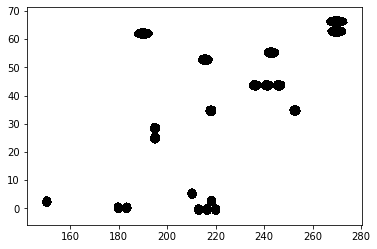

In [22]:
pl.plot(urand['RA'].data, urand['DEC'].data, lw=0.0, c='k', marker=',')

In [23]:
rosette_num = np.array([tile2rosette(x) for x in urand['TILEID']])

In [24]:
np.unique(rosette_num)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [26]:
# Number of randoms in rosette 17.
np.count_nonzero(rosette_num == 17)

22774

In [27]:
ros = urand[rosette_num == 0]

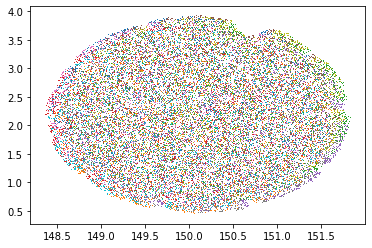

In [28]:
# pl.plot(ros['RA'], ros['DEC'], lw=0.0, c='k', marker=',', alpha=0.5)

for uids in np.unique(ros['TILEID']):
    intile = ros['TILEID'] == uids
    
    pl.plot(ros['RA'][intile], ros['DEC'][intile], lw=0.0, marker=',')

## SV3 assignable area:

In [30]:
# Each random file (10 sets of 18 files) has a density of 2500 per sq deg. 
len(urand) / 2500.

183.2512

## Caveat 

A buffer area was made unassignable around e.g. the edge of each petal to prevent fibers being assigned by fiberassign, but being unassignable by platemaker (due to the more accurate astrometry in the latter).  Due to a bug, this buffer was not accounted for correctly in FAVAIL.

### https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent

gives 20 rosettes with an effective area of 6.94 deg.$^2$ per rosette for a total area of 140 deg.$^2$. 

In [32]:
# Original desi target randoms.  
# ff = fits.open('/global/cfs/cdirs/desi/target/catalogs/dr9/0.49.0/randoms/resolve/randoms-1-1.fits')
# ff[1].header

# Done.